In [1]:
from platform import python_version

print(python_version())

3.10.12


In [2]:
import torch 

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns


In [35]:
data = pd.read_csv("../data/ml-100k/u.data", sep="\t", names=["user_id", "movie_id", "rating", "timestamp"])

data.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### Some statistics and data distributions

In [36]:
data.describe()

,user_id,movie_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


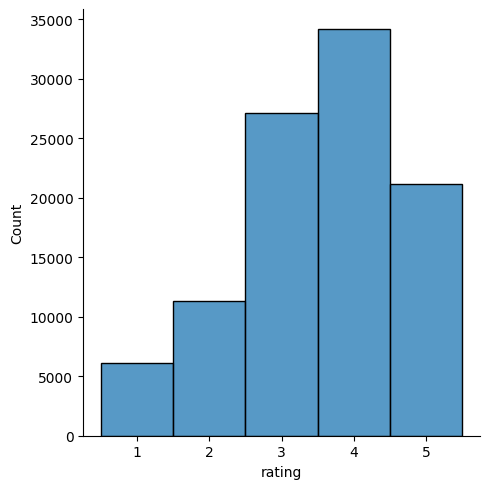

In [98]:
# distribution of ratings
sns.displot(data.rating, discrete=True)

<Axes: xlabel='rating', ylabel='Proportion'>

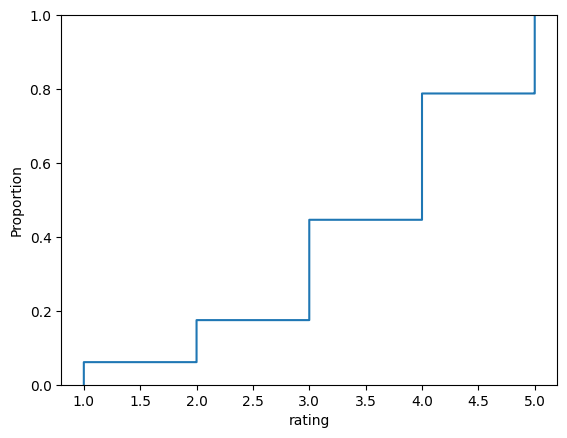

In [39]:
sns.ecdfplot(data.rating)

In [32]:
# assign the movies their genres 
genres = pd.read_csv(
    "../data/ml-100k/u.item",
    sep="|",
    names=[
        "movie_id", "movie_title", "release_date",
        "video_release_date", "IMDb_URL", "unknown",
        "Action", "Adventure", "Animation", "Children",
        "Comedy", "Crime", "Documentary", "Drama",
        "Fantasy", "Film-Noir", "Horror", "Musical",
        "Mystery", "Romance", "Sci-Fi",
        "Thriller", "War", "Western"
    ],
    encoding="latin-1")

genres.head(2)

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
genres.describe()

,movie_id,video_release_date,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
# combine genre and movie dataframes and plot the distribution of genres
movie_data = pd.merge(data, genres, on="movie_id")

# drop video_release_date column as it is empty
movie_data.drop(columns=["video_release_date"], inplace=True)

movie_data.head(2)

,user_id,movie_id,rating,timestamp,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
genre_columns = movie_data.columns[7:].values.tolist()
genre_columns

['unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [94]:
# genre_dist = pd.Series(movie_data.iloc[0:300, 7:].sum(axis=0)).reset_index().rename(columns={"index": "genre", 0: "count"})
genre_dist = pd.Series(movie_data.iloc[:, 7:].sum(axis=0)).reset_index().rename(columns={"index": "genre", 0: "count"})
genre_dist

,genre,count
0,unknown,10
1,Action,25589
2,Adventure,13753
3,Animation,3605
4,Children,7182
5,Comedy,29832
6,Crime,8055
7,Documentary,758
8,Drama,39895
9,Fantasy,1352


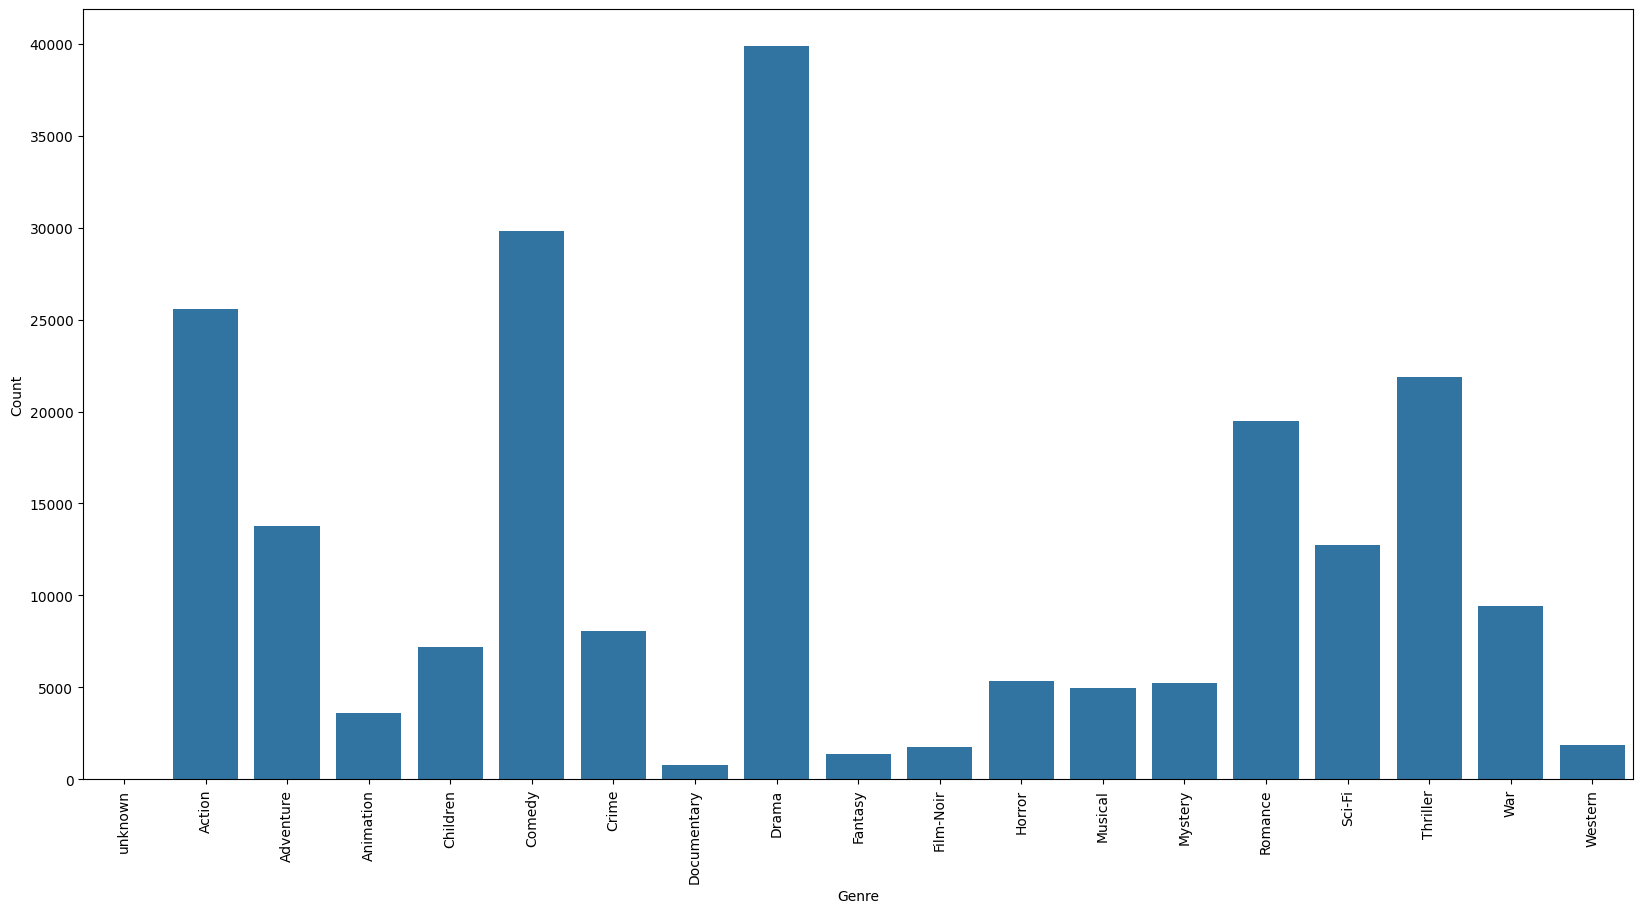

In [97]:
plt.figure(figsize=(20, 10))

sns.barplot(genre_dist, x="genre", y="count")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


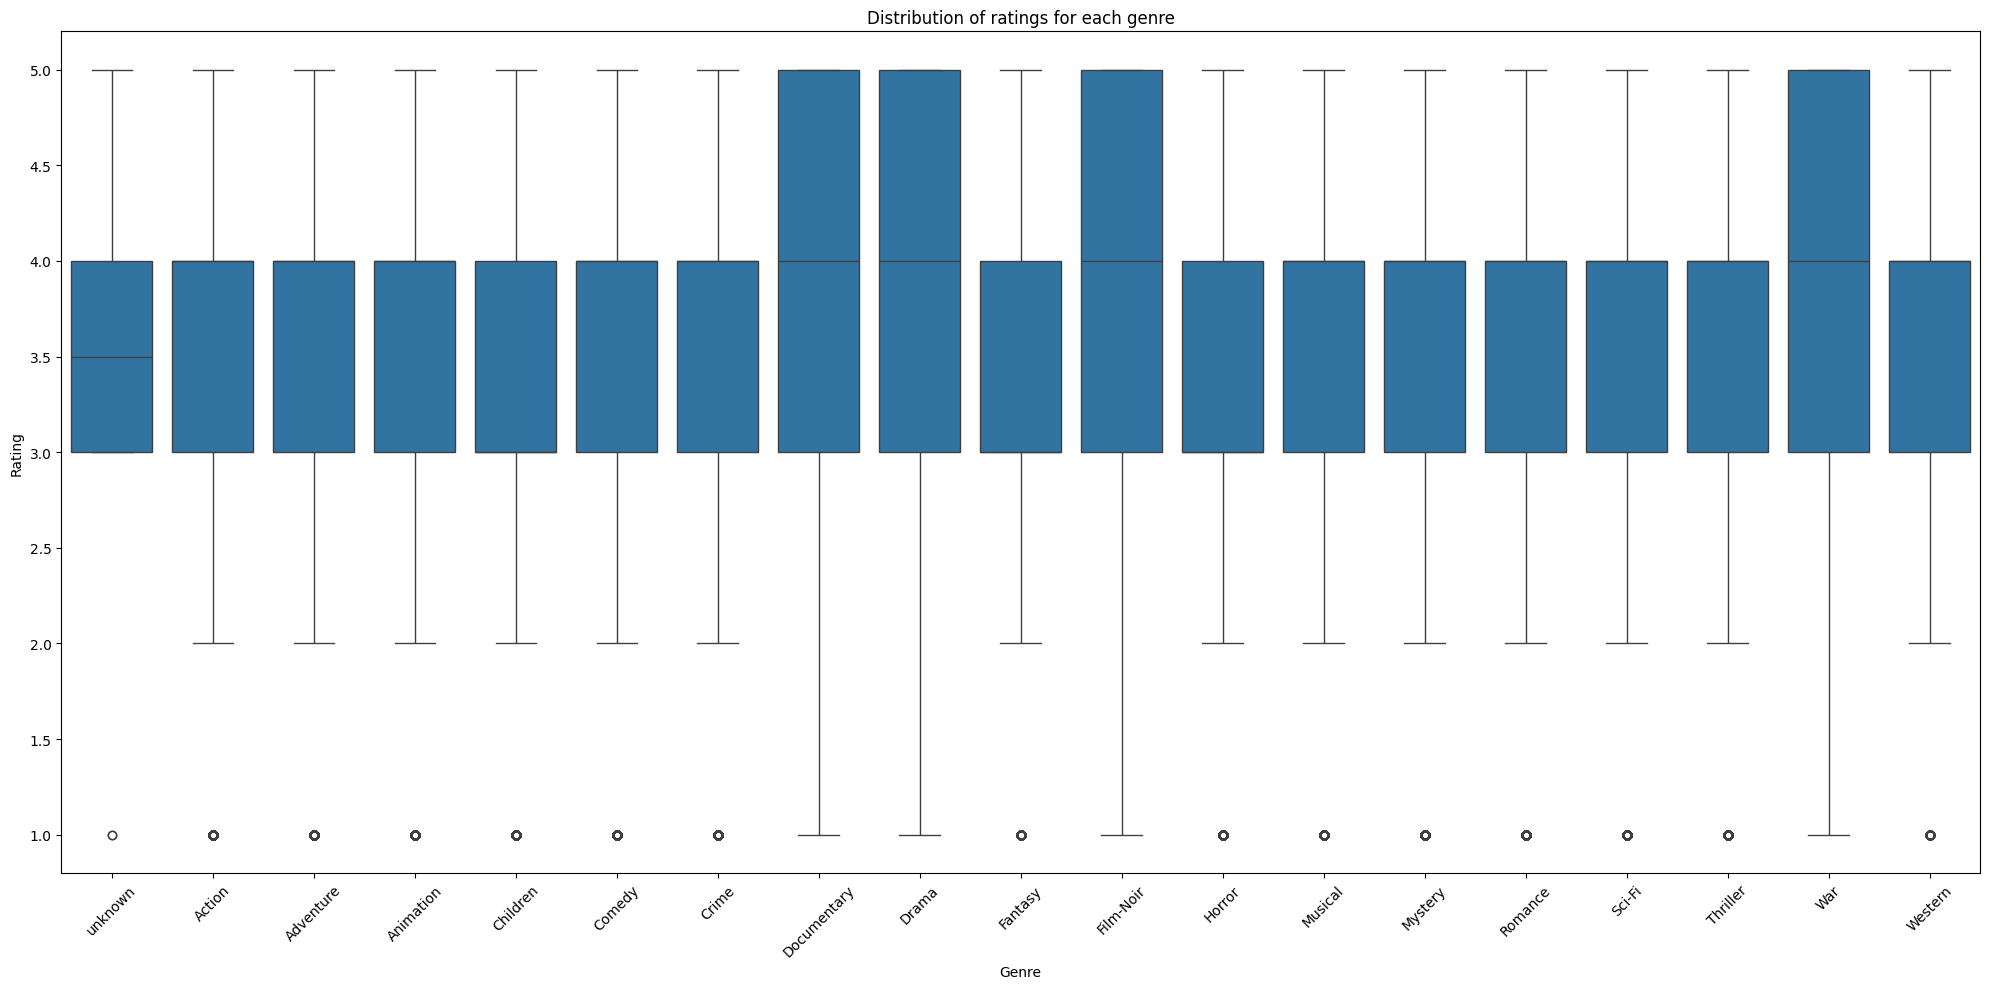

In [113]:
# We have the genres of the movies, along with their ratings in the merged dataframe movie_data. We want 
# a box plot of the ratings for each genre. 

# melt the dataframe to get the ratings in a single column
# movie_data_melted = pd.melt(movie_data, id_vars=["movie_id", "movie_title", "release_date", "IMDb_URL", "unknown", "Action", "Adventure", "Animation", "Children", "Comedy", "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"], value_vars=["rating"], var_name="rating", value_name="rating_value")
# 
# movie_data_melted = movie_data_melted[movie_data_melted.value]
# movie_data_melted.head(5)

data_melted = pd.melt(movie_data, id_vars='rating', value_vars=genre_columns, var_name='genre')  # , value_name='genre_value')

# Filter zero value rows 
data_melted = data_melted[data_melted.value == 1]

# Create boxplot 
plt.figure(figsize=(20, 10))
sns.boxplot(data=data_melted, x='genre', y='rating')
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.title("Distribution of ratings for each genre")
plt.tight_layout()
plt.show()


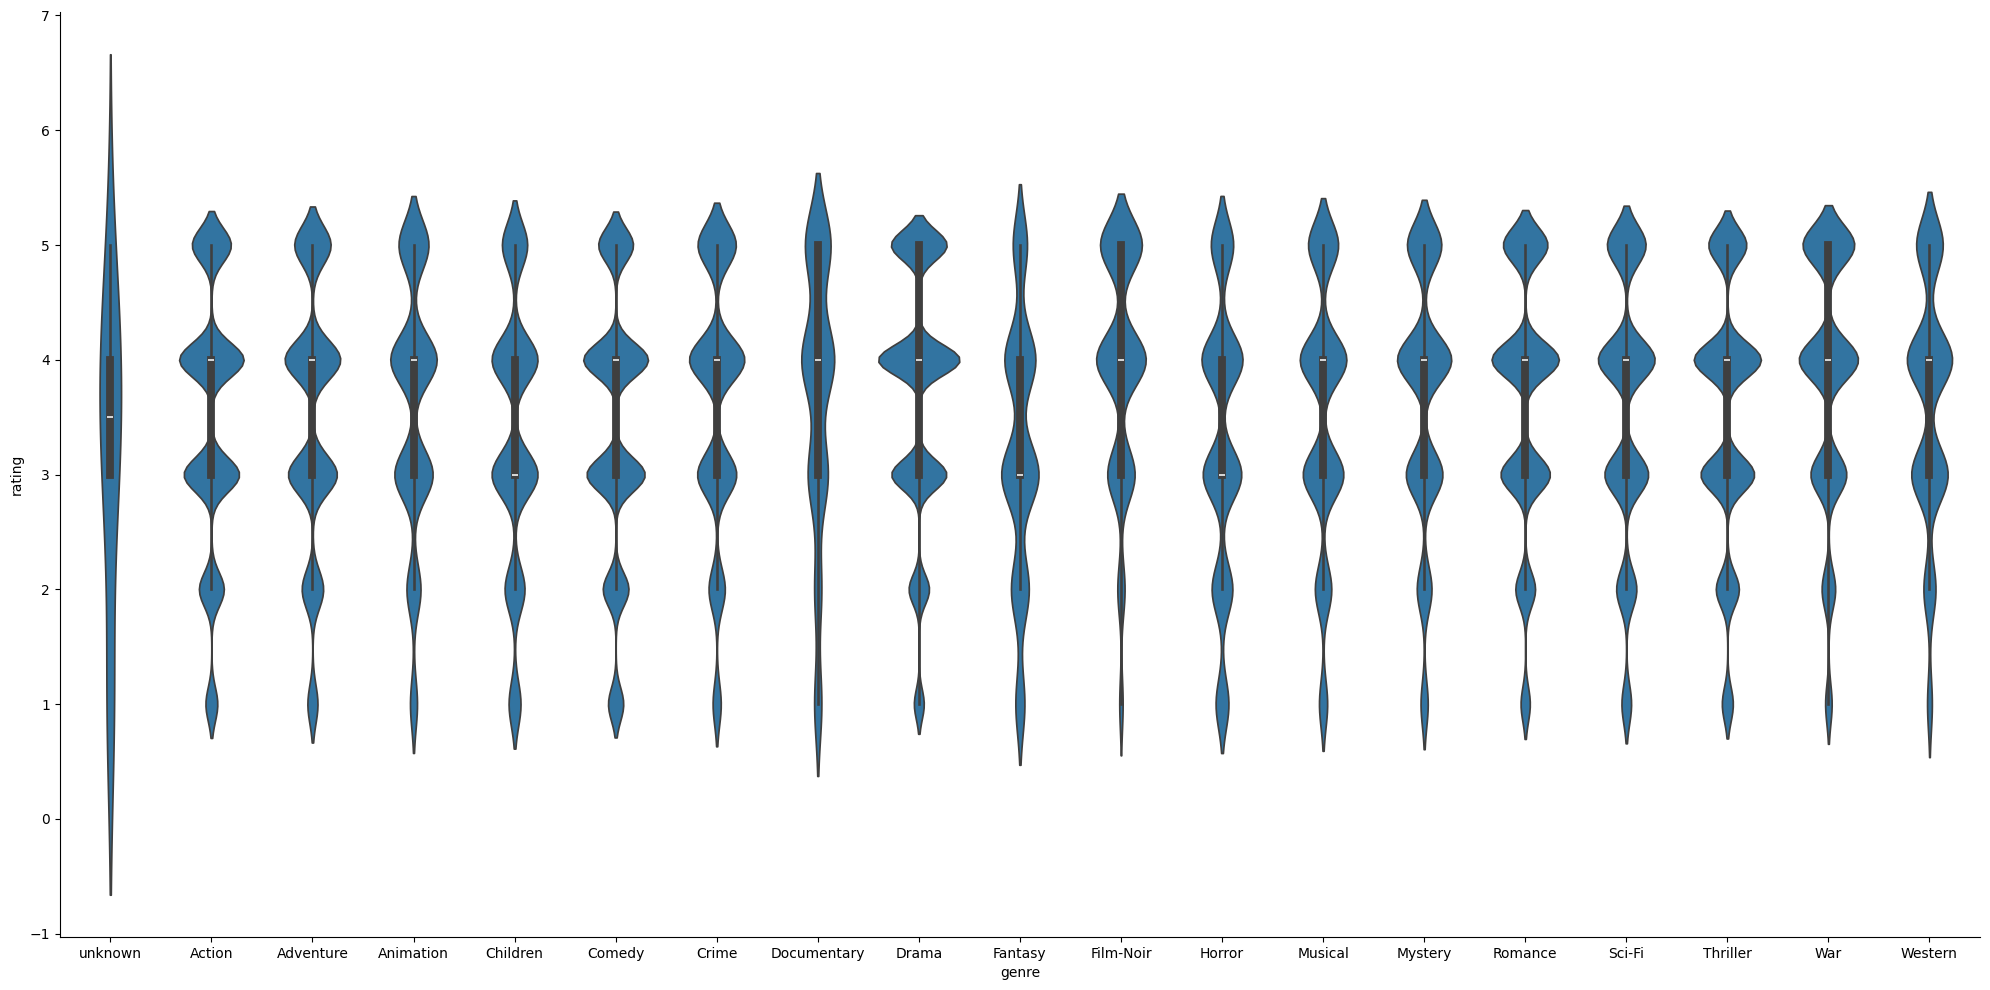

In [119]:
sns.catplot(data=data_melted, x='genre', y='rating', kind='violin', height=10, aspect=2)

In [123]:
# Plot the distribution of yearly releases of movies
movie_data.release_date = pd.to_datetime(movie_data.release_date)
movie_data["year"] = movie_data.release_date.dt.year
movie_data.head(2)



,user_id,movie_id,rating,timestamp,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,196,242,3,881250949,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,1997.0
1,63,242,3,875747190,Kolya (1996),1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,1997.0


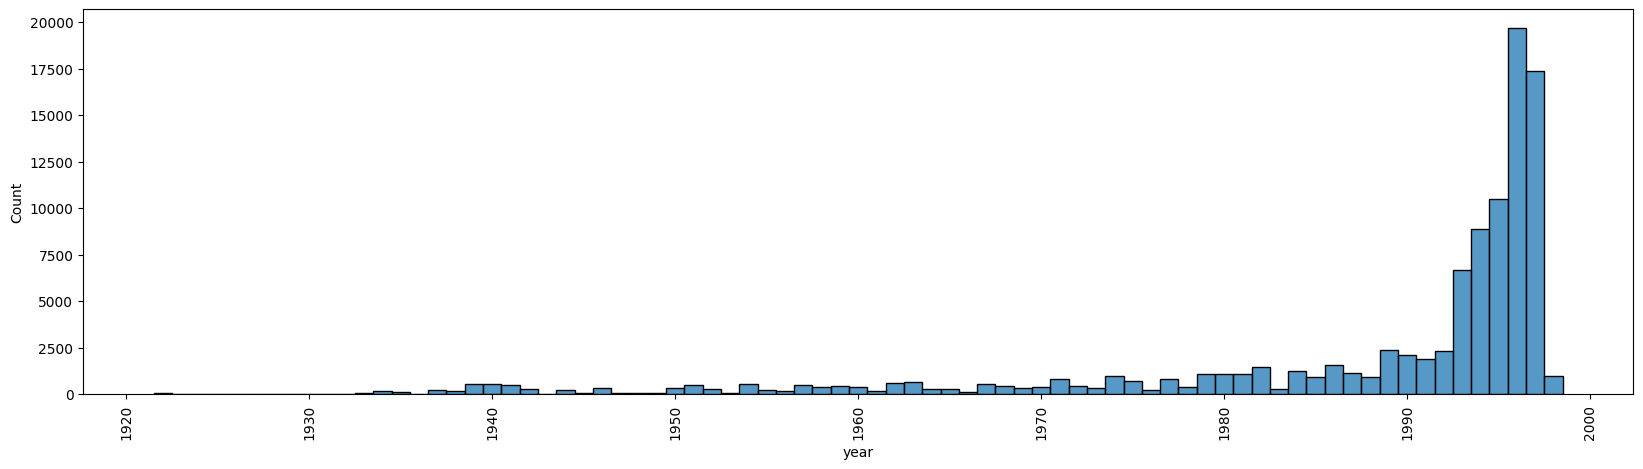

In [127]:
plt.figure(figsize=(20, 5))
sns.histplot(data=movie_data, x="year", discrete=True)
plt.xticks(rotation=90)
plt.show()


In [128]:
# density plot for ratings per genre
plt.figure(figsize=(20, 10))
sns.kdeplot(data=movie_data, x="rating", hue="genre", multiple="stack")
plt.show()


ValueError: Could not interpret value `genre` for `hue`. An entry with this name does not appear in `data`.

<Figure size 2000x1000 with 0 Axes>

In [133]:
movie_data.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'movie_title',
       'release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'year'],
      dtype='object')

In [135]:
count_df = pd.DataFrame()
for genre in genre_columns:
    subset = movie_data[movie_data[genre] == 1]
    counts = subset.rating.value_counts()  # .sort_index()
    # print(f"{genre}: {counts}")
    count_df[genre] = counts
    
count_df = count_df.sort_index()
count_df

,unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1,2,1547,804,186,574,2279,417,59,1766,112,45,503,285,255,942,724,1245,367,71
3,3,7254,3901,1018,2218,8751,2006,164,9877,461,367,1513,1418,1306,5061,3296,6088,2020,540
4,4,8431,4436,1232,2212,9722,2835,268,14608,383,664,1610,1627,1933,6882,4277,7613,3335,670
5,1,5103,2903,796,1217,5224,1963,209,9997,176,560,877,1050,1225,4559,2914,4312,2914,394


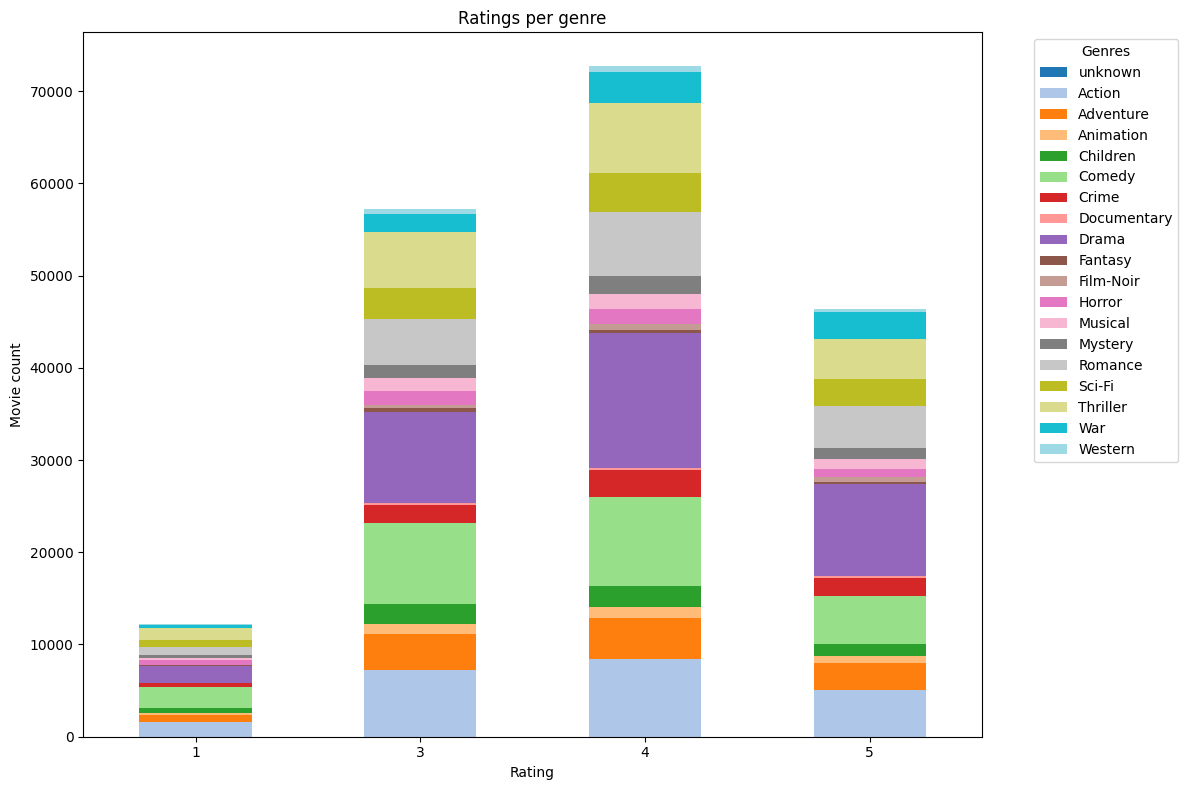

In [137]:
colormap = plt.cm.tab20 
colors = [colormap(i) for i in np.linspace(0, 1, len(genre_columns))]

fig, ax = plt.subplots(figsize=(12, 8))
count_df.plot(kind='bar', stacked=True, ax=ax, color=colors)
ax.set_title("Ratings per genre")
ax.set_xlabel("Rating")
ax.set_ylabel("Movie count")
plt.xticks(rotation=0)
plt.legend(title="Genres", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipykernel_96796/2993200942.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(genre_data['rating'], shade=False, label=genre, bw=0.5)
/tmp/ipykernel_96796/2993200942.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(genre_data['rating'], shade=False, label=genre, bw=0.5)
/tmp/ipykernel_96796/2993200942.py:8: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(genre_data['rating'], shade=False, label=genre, bw=0.5)
/tmp/ipykernel_96796/2993200942.py:8: FutureWarning: 

`sha

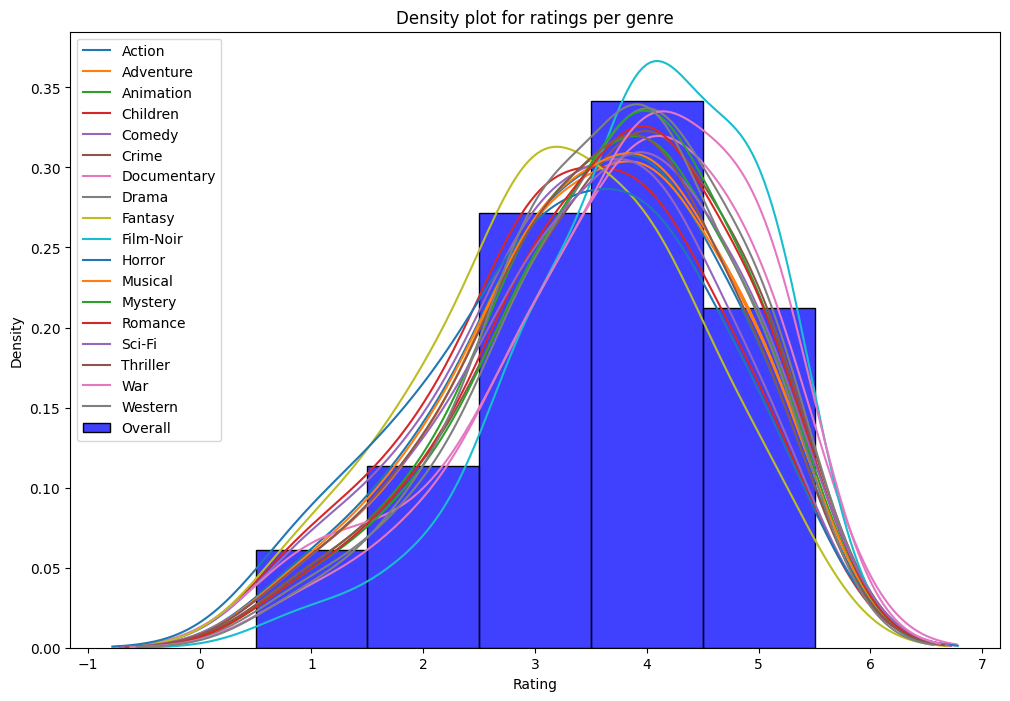

In [150]:
# # density plot for ratings per genre
plt.figure(figsize=(12, 8))

# remove 'unknown'
for genre in genre_columns[1:]:
    genre_data = movie_data[movie_data[genre] == 1]
    # genre_data['rating'].plot.kde(label=genre)
    sns.kdeplot(genre_data['rating'], shade=False, label=genre, bw=0.5)

sns.histplot(
    data=movie_data,
    x='rating',
    kde=False,
    discrete=True, #bins=np.arange(0.5, 6.5, 1),
    color='blue',
    label='Overall',
    stat="density"
)

plt.title("Density plot for ratings per genre")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.legend(loc='upper left')
# plt.xlim(0, 5)
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.tight_layout()
plt.show()

In [154]:
# filter the year in parentheses from the title column
movie_data.movie_title = movie_data.movie_title.str.replace(r"\(\d{4}\)", "")
movie_data.head(2)


/tmp/ipykernel_96796/2538253802.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  movie_data.movie_title = movie_data.movie_title.str.replace(r"\(\d{4}\)", "")


,user_id,movie_id,rating,timestamp,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,196,242,3,881250949,Kolya,1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,1997.0
1,63,242,3,875747190,Kolya,1997-01-24,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,...,0,0,0,0,0,0,0,0,0,1997.0


# Towards graph creation 
 

In [159]:
import networkx as nx 
import nxviz as nv

from networkx.algorithms import bipartite
from nxviz import annotate 


In [156]:
movie_data.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'movie_title',
       'release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'year'],
      dtype='object')

In [157]:
# create a graph from the movie data
G = nx.from_pandas_edgelist(movie_data, source="user_id", target="movie_id", edge_attr=["rating", "timestamp"])
G

In [158]:
# Starter statistics on the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Number of self-loops: {nx.number_of_selfloops(G)}")  # there should be none 
print(f"Is the graph directed: {nx.is_directed(G)}")
print(f"Is the graph connected: {nx.is_connected(G)}") 
print(f"Number of connected components: {nx.number_connected_components(G)}")


Number of nodes: 1682
Number of edges: 94928
Number of self-loops: 94
Is the graph directed: False
Is the graph connected: True
Number of connected components: 1


In [161]:
bipartite.is_bipartite(G)

False

In [162]:
# Ok that's unfortunate, this should be a bipartite graph 
# Fix it!


In [177]:
H = nx.Graph()

# Add users and movies as sets of nodes, in bipartite manner
for user in movie_data.user_id.unique():
    H.add_node(f'u_{user}', bipartite=0)

for movie in movie_data.movie_id.unique():
    H.add_node(f'm_{movie}', bipartite=1)

# Add the edges:
for item in movie_data.itertuples(index=False):
    H.add_edge(f'u_{item.user_id}', f'm_{item.movie_id}', rating=item.rating, timestamp=item.timestamp)

# Now I hope this is right
assert bipartite.is_bipartite(H)
    

In [178]:
bipartite.is_bipartite(H)

True

In [179]:
print(f"Number of nodes: {H.number_of_nodes()}")
print(f"Number of edges: {H.number_of_edges()}")
print(f"Number of self-loops: {nx.number_of_selfloops(H)}")  # there should be none 
print(f"Is the graph directed: {nx.is_directed(H)}")
print(f"Is the graph connected: {nx.is_connected(H)}") 
print(f"Number of connected components: {nx.number_connected_components(H)}")


Number of nodes: 2625
Number of edges: 100000
Number of self-loops: 0
Is the graph directed: False
Is the graph connected: True
Number of connected components: 1


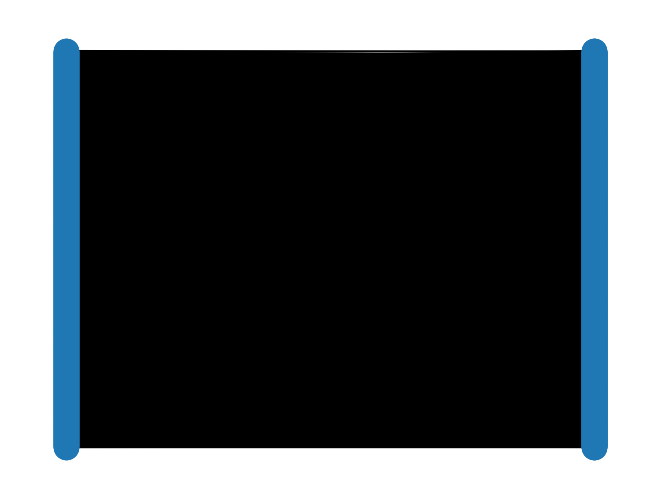

In [185]:
pos = nx.bipartite_layout(H, movie_data.user_id.apply(lambda x: f'u_{x}').unique())

nx.draw(H, pos=pos)

In [181]:
bipartite.sets(H)

({'u_1',
  'u_10',
  'u_100',
  'u_101',
  'u_102',
  'u_103',
  'u_104',
  'u_105',
  'u_106',
  'u_107',
  'u_108',
  'u_109',
  'u_11',
  'u_110',
  'u_111',
  'u_112',
  'u_113',
  'u_114',
  'u_115',
  'u_116',
  'u_117',
  'u_118',
  'u_119',
  'u_12',
  'u_120',
  'u_121',
  'u_122',
  'u_123',
  'u_124',
  'u_125',
  'u_126',
  'u_127',
  'u_128',
  'u_129',
  'u_13',
  'u_130',
  'u_131',
  'u_132',
  'u_133',
  'u_134',
  'u_135',
  'u_136',
  'u_137',
  'u_138',
  'u_139',
  'u_14',
  'u_140',
  'u_141',
  'u_142',
  'u_143',
  'u_144',
  'u_145',
  'u_146',
  'u_147',
  'u_148',
  'u_149',
  'u_15',
  'u_150',
  'u_151',
  'u_152',
  'u_153',
  'u_154',
  'u_155',
  'u_156',
  'u_157',
  'u_158',
  'u_159',
  'u_16',
  'u_160',
  'u_161',
  'u_162',
  'u_163',
  'u_164',
  'u_165',
  'u_166',
  'u_167',
  'u_168',
  'u_169',
  'u_17',
  'u_170',
  'u_171',
  'u_172',
  'u_173',
  'u_174',
  'u_175',
  'u_176',
  'u_177',
  'u_178',
  'u_179',
  'u_18',
  'u_180',
  'u_181',

In [186]:
# movie_data.user_id.apply(lambda x: f'u_{x}').unique()

In [ ]:
nv.matrix(H, node_color_by='bipartite')